<a href="https://colab.research.google.com/github/BurovNV/MyRepo/blob/main/Class_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В опорно-векторном методе баланс смещения/разброса контролируется с помощью гиперпараметра С — штрафа, налагаемого на ошибки. 

С — это параметр и штраф за ошибочное классифицирование точки данных. Когда значение С мало, классификатор позволяет бОльшему кол-ву точек попасть в маржу. 

Когда значение С большое, классификатор сильно штрафуется  и сужает маржу, чтобы избежать ошибочно классифицированных точек.

Линейно разделимые данные

In [1]:
# импорт
import numpy as np
from sklearn.datasets import (make_blobs, make_circles, make_moons)
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# создание линейно разделимых данных
X_blob, y_blob = make_blobs(n_samples=100,
                            n_features=2,
                            centers=3,
                            cluster_std=3,
                            random_state=42)

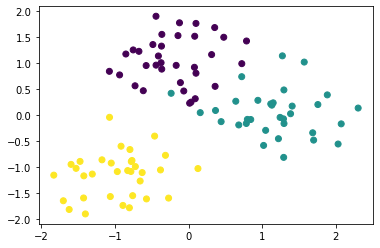

In [3]:
# стандартизация и печать
scaler     = StandardScaler()
X_blob_std = scaler.fit_transform(X_blob)
plt.scatter(X_blob_std[:, 0], X_blob_std[:, 1], c=y_blob)

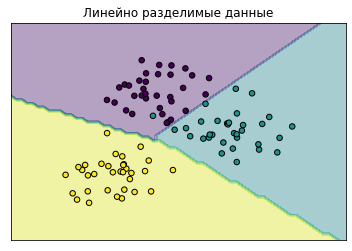

In [4]:
# обучение классификатора
svc_linear = SVC(C=1,              # штраф по дефолту 
                 kernel='linear')  # линейное ядро
svc_linear.fit(X_blob_std, y_blob)
# печать
# настройка минимума и максимума для создания поля с точками
x_min, x_max = X_blob_std[:, 0].min()-1, X_blob_std[:, 0].max()+1
y_min, y_max = X_blob_std[:, 1].min()-1, X_blob_std[:, 1].max()+1
# поле с точками для классификации с шагом 0,1 между точками
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
# предикты для этого поля
Z = svc_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# окраска поля по контуру классов из предикта
plt.contourf(xx, yy, Z, alpha=0.4)
# вывод оригинального датасета с истинными метками
plt.scatter(X_blob_std[:, 0], X_blob_std[:, 1], c=y_blob,
            s=30,            # диаметр точек
            edgecolors='k')  # цвет окантовки точек
plt.title('Линейно разделимые данные')
plt.xticks([])
plt.yticks([])
plt.show()


Линейно неразделимые данные

Первый вариант - через полиномиальное ядро

In [5]:
# данные
X_circles, y_circles = make_circles(n_samples=100,
                                    noise=0.25,
                                    factor=0.3,
                                    random_state=42)

X_moons, y_moons     = make_moons(n_samples=100,
                                  noise=0.15,
                                  random_state=42)

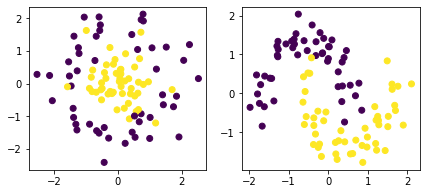

In [6]:
# стандартизация и печать
scaler        = StandardScaler()
X_circles_std = scaler.fit_transform(X_circles)
X_moons_std   = scaler.fit_transform(X_moons)
plt.figure(figsize=(7, 3))
plt.subplot(121)
plt.scatter(X_circles_std[:, 0], X_circles_std[:, 1], c=y_circles)
plt.subplot(122)
plt.scatter(X_moons_std[:, 0], X_moons_std[:, 1], c=y_moons)
plt.show()

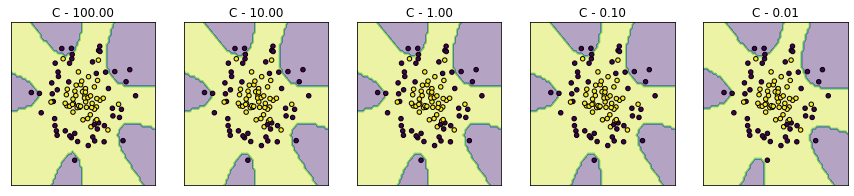

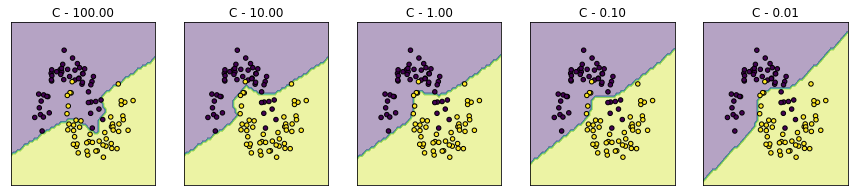

In [10]:
# размер штрафа
c_list = [100, 10, 1, 0.1, 0.01]
# обучение и печать результатов
for ind, data in enumerate([(X_circles_std, y_circles),
                            (X_moons_std, y_moons)]):
  # холст
  plt.figure(figsize=(15, 3))
  for ind_, c in enumerate(c_list):
    # обучение классификатора
    svc_poly = SVC(C=c,              # штраф из списка
                   kernel='poly',    # полиномиальное ядро
                   degree=5,         # макс степень - 5
                   gamma=1,
                   random_state=42)
    svc_poly.fit(data[0], data[1])
    # печать
    # субплот 1 строка 5 колонок
    plt.subplot(1, 5, ind_+1)
    # настройка минимума и максимума для создания поля с точками
    x_min, x_max = data[0][:, 0].min()-1, data[0][:, 0].max()+1
    y_min, y_max = data[0][:, 1].min()-1, data[0][:, 1].max()+1
    # поле с точками для классификации с шагом 0,1 между точками
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    # предикты для этого поля
    Z = svc_poly.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # окраска поля по контуру классов из предикта
    plt.contourf(xx, yy, Z, alpha=0.4)
    # вывод оригинального датасета с истинными метками
    plt.scatter(data[0][:, 0], 
                data[0][:, 1], c=data[1],
                s=20,                      # диаметр точек
                edgecolors='k')            # цвет окантовки точек
    plt.title(f'C - {c:.2f}')
    plt.xticks([])
    plt.yticks([])
plt.show()

Второй вариант - через гауссово ядро.

gamma - штраф на размер ядра - чем выше, тем сложнее модель, поэтому C и gamma ругулируются как правило вместе.

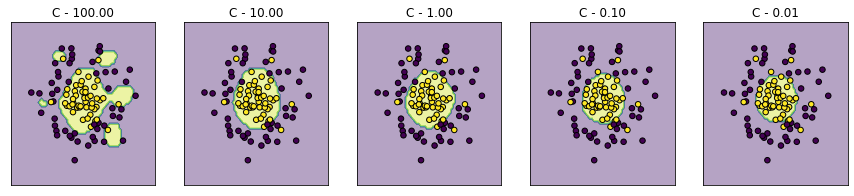

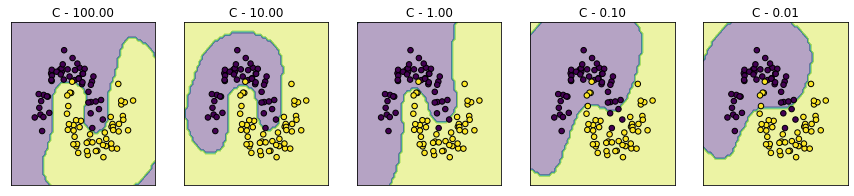

In [11]:
# размер штрафа
c_list = [100, 10, 1, 0.1, 0.01]
# обучение и печать результатов
for ind, data in enumerate([(X_circles_std, y_circles),
                            (X_moons_std, y_moons)]):
  # холст
  plt.figure(figsize=(15, 3))
  for ind_, c in enumerate(c_list):
    # обучение классификатора
    svc_rbf = SVC(C=c,              # штраф из списка
                  kernel='rbf',     # полиномиальное ядро
                  gamma=1,          # штраф на размер гауссова ядра
                  random_state=42)
    svc_rbf.fit(data[0], data[1])
    # печать
    # субплот 1 строка 5 колонок
    plt.subplot(1, 5, ind_+1)
    # настройка минимума и максимума для создания поля с точками
    x_min, x_max = data[0][:, 0].min()-1, data[0][:, 0].max()+1
    y_min, y_max = data[0][:, 1].min()-1, data[0][:, 1].max()+1
    # поле с точками для классификации с шагом 0,1 между точками
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    # предикты для этого поля
    Z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # окраска поля по контуру классов из предикта
    plt.contourf(xx, yy, Z, alpha=0.4)
    # вывод оригинального датасета с истинными метками
    plt.scatter(data[0][:, 0], 
                data[0][:, 1], c=data[1],
                s=30,                      # диаметр точек
                edgecolors='k')            # цвет окантовки точек
    plt.title(f'C - {c:.2f}')
    plt.xticks([])
    plt.yticks([])
plt.show()